In [1]:
%pylab notebook

import pandas as pd
import numpy as np
import datetime
import os

import ipywidgets as widgets

from cognite.client import CogniteClient   

Populating the interactive namespace from numpy and matplotlib


In [2]:
client = CogniteClient(api_key=os.environ["OID_API_KEY"]) 

### Get all timeseries relevant for the compressor

In [52]:
# If we know the tag
compressor_tag = '23-KA-9101'
client.asset.get_assets(name=compressor_tag).to_pandas()

,createdTime,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,VRD - 1ST STAGE COMPRESSOR,3047932288982463,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '583453', ...",23-KA-9101,4856008121737468,"[6687602007296940, 4650652196144007, 311145472..."


In [53]:
time_series = client.time_series.get_timeseries(asset_id=3047932288982463).to_pandas()
time_series

,assetId,createdTime,description,id,isStep,isString,lastUpdatedTime,name
0,3047932288982463,0,PH (CBM) 1st Stage ActCompr Poly Eff,1168579423881228,False,False,0,VAL_23-KA-9101_APE:VALUE
1,3047932288982463,0,PH (CBM) 1st Stg ActCompr Poly Head,1445950862760768,False,False,0,VAL_23-KA-9101_APH:VALUE
2,3047932288982463,0,PH (CBM) 1st Stage ActPress Ratio,1651849554171220,False,False,0,VAL_23-KA-9101_APR:VALUE
3,3047932288982463,0,PH (CBM) 1st Stage ActShaft Power,3272083859197025,False,False,0,VAL_23-KA-9101_ASP:VALUE
4,3047932288982463,0,PH (CBM) 1st Stage ExpCompr Poly Eff,1364398146970196,False,False,0,VAL_23-KA-9101_EPE:VALUE
5,3047932288982463,0,PH (CBM) 1st Stg ExpCompr Poly Head,775980103118566,False,False,0,VAL_23-KA-9101_EPH:VALUE
6,3047932288982463,0,PH (CBM) 1st Stage ExpPress Ratio,4814066948454208,False,False,0,VAL_23-KA-9101_EPR:VALUE
7,3047932288982463,0,PH (CBM) 1st Stage ExpShaft Power,8674960614531637,False,False,0,VAL_23-KA-9101_ESP:VALUE
8,3047932288982463,0,PH (CBM) 1st Stage Poly Eff Dev,8820047846638351,False,False,0,VAL_23-KA-9101_PED:VALUE
9,3047932288982463,0,PH (CBM) 1st Stage Poly Head Dev,7596572230294648,False,False,0,VAL_23-KA-9101_PHD:VALUE


In [54]:
# Let us check how much data we have
start = 0
end = 'now'
granularity = '1d'
aggregates = ['avg']
data = client.datapoints.get_datapoints_frame(time_series = list(time_series.name.values), start=start, end=end, aggregates=aggregates, granularity=granularity)

In [55]:
df = data.copy()
df.timestamp = pd.to_datetime(df.timestamp, unit='ms')
df

,timestamp,VAL_23-KA-9101_APE:VALUE|average,VAL_23-KA-9101_APH:VALUE|average,VAL_23-KA-9101_APR:VALUE|average,VAL_23-KA-9101_ASP:VALUE|average,VAL_23-KA-9101_EPE:VALUE|average,VAL_23-KA-9101_EPH:VALUE|average,VAL_23-KA-9101_EPR:VALUE|average,VAL_23-KA-9101_ESP:VALUE|average,VAL_23-KA-9101_PED:VALUE|average,VAL_23-KA-9101_PHD:VALUE|average,VAL_23-KA-9101_PRD:VALUE|average,VAL_23-KA-9101_SPD:VALUE|average
0,2012-10-08,4.641745,0.948657,1.008833,-0.020536,0.000000,0.000000,1.000000,0.000000,4.641745,0.000000,0.883291,0.000000
1,2012-10-09,669.789896,0.838363,1.007955,-2.321790,0.000000,0.000000,1.000000,0.000000,669.789896,0.000000,0.795454,0.000000
2,2012-10-10,-22.509459,0.771091,1.007522,-5.726379,0.000000,0.000000,1.000000,0.000000,-22.509459,0.000000,0.752159,0.000000
3,2012-10-11,136.282613,0.860683,1.008192,-0.503765,0.000000,0.000000,1.000000,0.000000,136.282613,0.000000,0.819240,0.000000
4,2012-10-12,-195.060245,0.679394,1.006365,-0.372573,0.000000,0.000000,1.000000,0.000000,-195.060245,0.000000,0.636464,0.000000
5,2012-10-13,-297.545844,0.418701,1.003906,-1.350992,0.000000,0.000000,1.000000,0.000000,-297.545844,0.000000,0.390642,0.000000
6,2012-10-14,58.676691,0.558093,1.005335,2.584139,0.000000,0.000000,1.000000,0.000000,58.676691,0.000000,0.533548,0.000000
7,2012-10-15,15.712854,0.628354,1.006043,-2.252048,0.000000,0.000000,1.000000,0.000000,15.712867,0.000000,0.604290,0.000000
8,2012-10-16,1331.939444,0.651906,1.006249,0.438108,0.000000,0.000000,1.000000,0.000000,1331.939444,0.000000,0.624528,0.000000
9,2012-10-17,216.013443,0.710109,1.006803,0.561675,0.000000,0.000000,1.000000,0.000000,216.013443,0.000000,0.680298,0.000000


In [56]:
data.describe()

,VAL_23-KA-9101_APE:VALUE|average,VAL_23-KA-9101_APH:VALUE|average,VAL_23-KA-9101_APR:VALUE|average,VAL_23-KA-9101_ASP:VALUE|average,VAL_23-KA-9101_EPE:VALUE|average,VAL_23-KA-9101_EPH:VALUE|average,VAL_23-KA-9101_EPR:VALUE|average,VAL_23-KA-9101_ESP:VALUE|average,VAL_23-KA-9101_PED:VALUE|average,VAL_23-KA-9101_PHD:VALUE|average,VAL_23-KA-9101_PRD:VALUE|average,VAL_23-KA-9101_SPD:VALUE|average
count,2106.000000,2106.000000,2106.000000,2106.000000,1970.000000,1970.000000,1970.000000,1970.000000,554.000000,1970.000000,1970.000000,1970.000000
mean,64.489737,129.433127,3.101059,6901.053177,55.094050,96.526796,2.253775,5925.935345,17.568910,15.285837,38.572794,6.706264
std,124.143121,57.738704,0.899404,3636.754485,34.907242,60.830555,1.044883,3652.973337,234.468156,17.567469,59.588811,6.269222
min,-2852.380135,0.000000,0.000000,-471.353132,0.000000,0.000000,0.000000,0.000000,-2852.380135,-17.269255,-5.478121,-25.971920
25%,81.326528,141.282380,3.148425,5030.279119,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.975294,0.000000
50%,83.235166,154.110046,3.387946,8901.182251,75.998915,126.785624,2.723519,8030.072628,46.320300,12.383140,19.859385,7.885425
75%,84.345064,163.456866,3.612541,9088.849006,80.422660,144.222807,3.073412,8309.738797,82.751839,22.091641,32.041104,10.244296
max,1532.344763,176.509070,4.066467,10730.620792,206.174040,157.842563,3.386636,9453.387170,1532.344763,233.959095,246.654312,132.579649


<IPython.core.display.Javascript object>


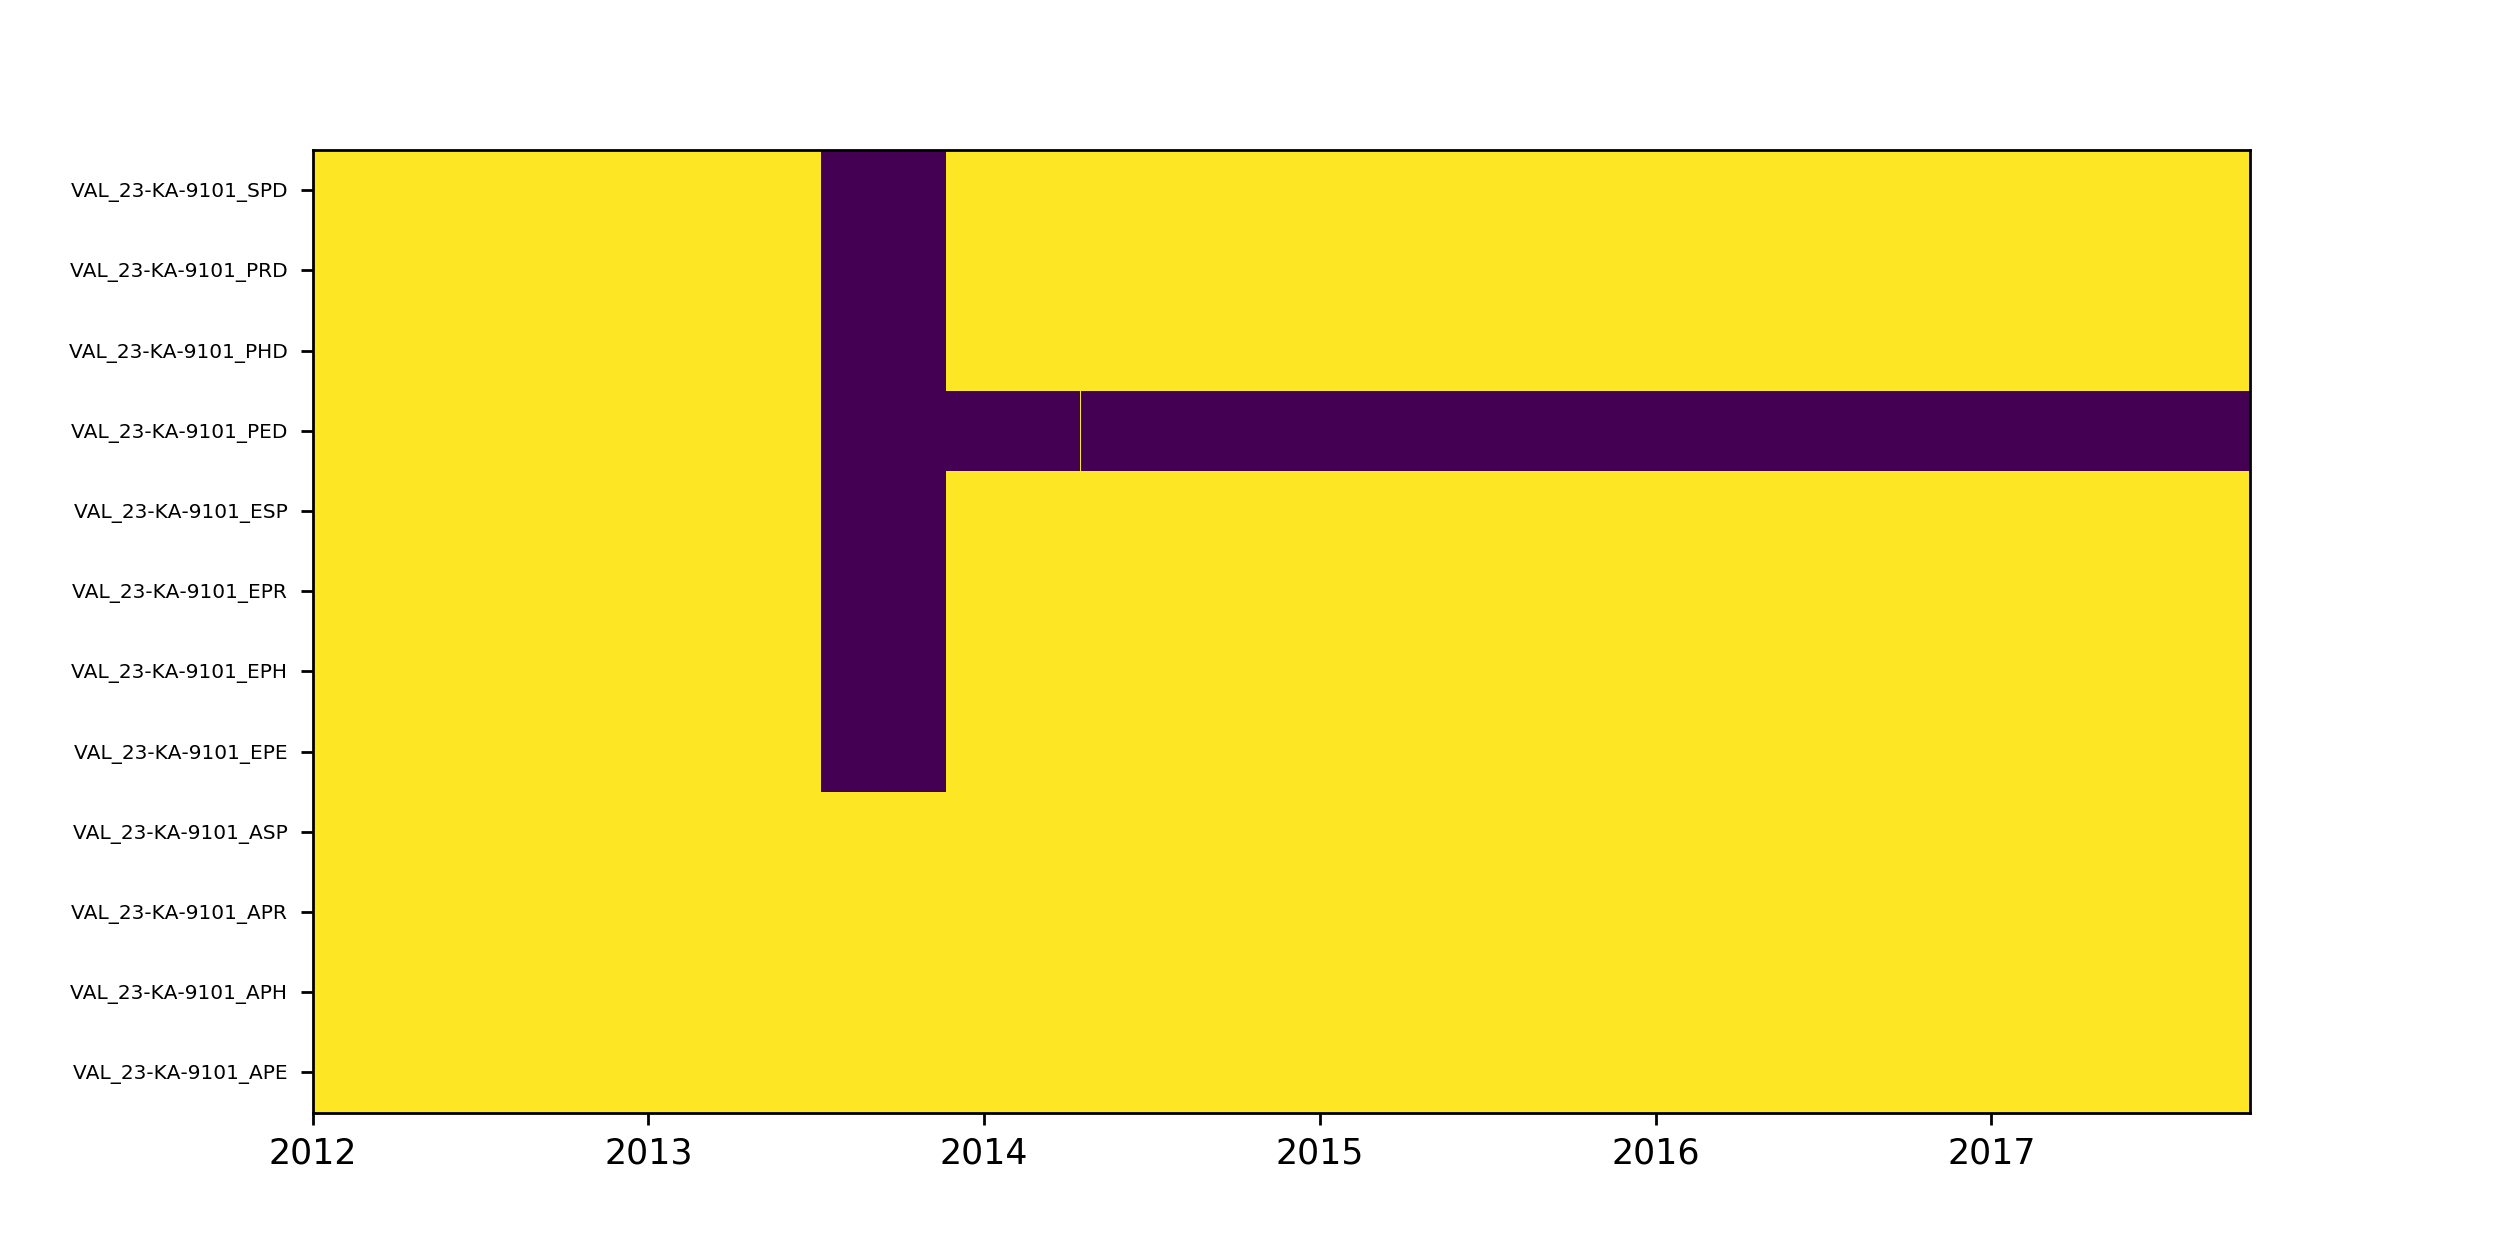

In [57]:
df_nan = 0.5*(~df.isnull().astype(int)+1)

plt.figure(figsize=(10,5))
A= plt.pcolor(df_nan.drop(['timestamp'], axis=1).values.transpose())
yloc = np.arange(0.5, len(df_nan.columns)-1+0.5)
ytick = [w[0] for w in list(df_nan.drop(['timestamp'],axis=1).columns.str.split(':'))]
A =plt.yticks(yloc, ytick, fontsize='xx-small')
xtick = [str(w).split('-')[0] for w in df.timestamp[df.index%365==0].values] 
xloc = np.arange(0, len(df), 365)
A = plt.xticks(xloc, xtick)

<IPython.core.display.Javascript object>


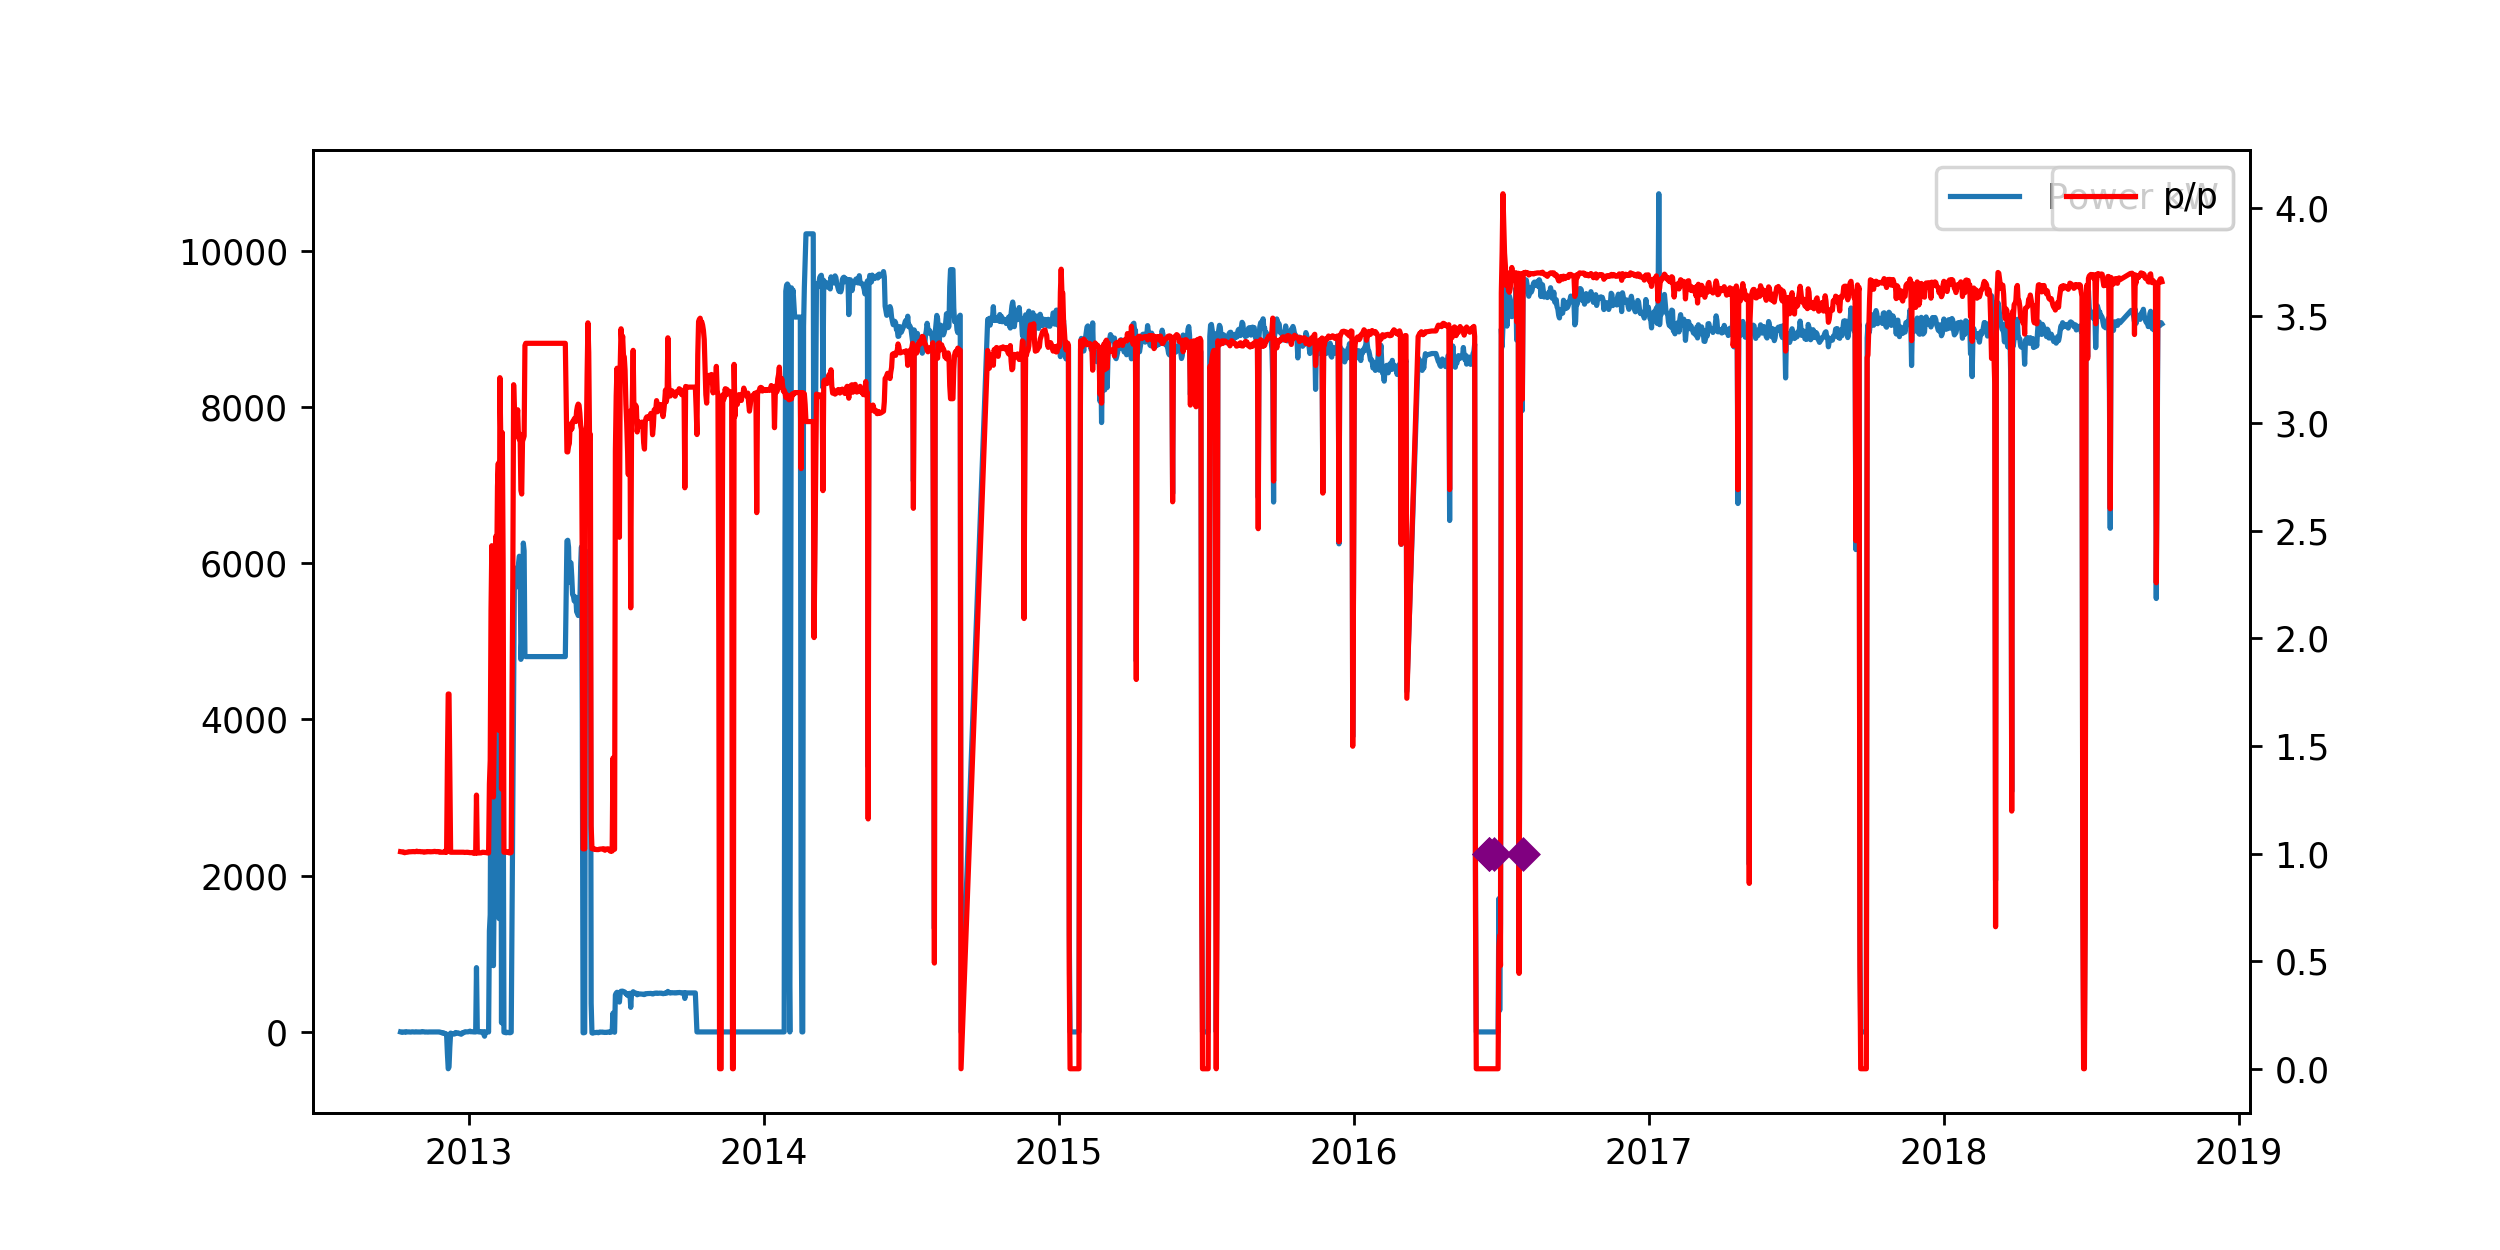

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
T = pd.to_datetime(data.timestamp, unit='ms')
ax.plot(T, data['VAL_23-KA-9101_ASP:VALUE|average'], label='Power kW')
ax2 = ax.twinx()
ax2.plot(T, data['VAL_23-KA-9101_APR:VALUE|average'], color='red', label='p/p')
ax.legend()
ax2.legend()

In [59]:
#Something seems to have happend between 2nd and 30th of June 2016
min_start_time = int(datetime.datetime(2016, 6, 1).timestamp()*1000)
max_end_time   = int(datetime.datetime(2016, 8, 15).timestamp()*1000)
events = client.events.search_for_events( min_start_time=min_start_time, max_end_time=max_end_time).to_pandas()
compressor_events = events[[3047932288982463 in aid for aid in events.assetIds]]
compressor_events

,MODPROJECT_NUMBER,MODPROJECT_TITLE,PMPROGRAM_NUMBER,WORKORDER_COMPLETIONDATE,WORKORDER_CONDITIONBEFORECODE,WORKORDER_CONDITIONBEFORENAME,WORKORDER_COSTCODE,WORKORDER_CREATEDDATE,WORKORDER_DESC,WORKORDER_DESTINATIONAREA,...,assetIds,createdTime,endTime,id,lastUpdatedTime,source,sourceId,startTime,subtype,type
8,,,PM-011153,2016-06-16T10:20:38,,,,2015-06-25T08:45:23,Vedlikehold elektro kompressor ***-KA-*** ETTE...,,...,"[801118318171042, 865112714719865, 92121632614...",1533736823960,1466072438000,219077073381237,1533736823960,akerbp-cdp,7393827539818738,1466060400000,VAL,Workorder
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[3047932288982463],1533132293480,1470403074000,322308482930538,1533132293480,akerbp-cdp,8302197383389018,1470034800000,VAL,Workitem
21,,,PM-012417,2016-06-18T09:05:26,,,,2015-06-25T08:47:03,Årlig ettersyn instrumentering kompressor ***-...,,...,"[702630644612, 8019487489463, 40737621439156, ...",1533736826936,1466240726000,577588494322615,1533736826936,akerbp-cdp,573696269143096,1466146800000,VAL,Workorder
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[3047932288982463],1533132293480,1466768036000,776160409448201,1533132293480,akerbp-cdp,3726255477781318,1466665200000,VAL,Workitem
33,,,PM-014055,2016-07-28T18:51:40,,,,2016-04-01T12:23:26,Smøreoljeprøve kompressorer,,...,[3047932288982463],1533736834054,1469731900000,970926350359039,1533736834054,akerbp-cdp,5689925244394401,1469689200000,VAL,Workorder
51,,,PM-016440,2016-08-05T13:17:54,,,,2016-04-01T09:15:14,ONSHORE JOB - Condition Monitoring Program (CM...,,...,"[3047932288982463, 3117826349444493, 619182742...",1533736822221,1470403074000,1478552026202531,1533736822221,akerbp-cdp,2865130624689278,1470034800000,VAL,Workorder
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[3047932288982463],1533132293480,1466240726000,1779211857075069,1533132293480,akerbp-cdp,7063934466253033,1466146800000,VAL,Workitem
96,,,PM-012508,2016-07-10T20:42:02,,,,2016-04-01T10:52:05,Vedlikehold ***-/*** for kompressor ***-KA-***,,...,"[453584366849025, 1308676097270399, 1557796748...",1533736835745,1468183322000,2149468184224400,1533736835745,akerbp-cdp,1248264431426097,1468220400000,VAL,Workorder
97,,,PM-016440,2016-06-10T10:28:39,,,,2016-04-01T09:15:12,ONSHORE JOB - Condition Monitoring Program (CM...,,...,"[3047932288982463, 3117826349444493, 619182742...",1533736822086,1465554519000,2205293464262179,1533736822086,akerbp-cdp,4318619192367072,1464764400000,VAL,Workorder
143,,,PM-016440,2016-07-11T14:34:14,,,,2016-04-01T09:15:14,ONSHORE JOB - Condition Monitoring Program (CM...,,...,"[3047932288982463, 3117826349444493, 619182742...",1533736822156,1468247654000,3352947980942434,1533736822156,akerbp-cdp,7514792758983881,1467356400000,VAL,Workorder


In [60]:
DE = compressor_events[['WORKORDER_NUMBER', 'WORKORDER_SHUTDOWNDESC']].copy()
DE['startTime'] = pd.to_datetime(compressor_events.startTime, unit='ms')
DE['endTime'] = pd.to_datetime(compressor_events.endTime, unit='ms')
DE.sort_values(by='startTime', inplace=True)
DE

,WORKORDER_NUMBER,WORKORDER_SHUTDOWNDESC,startTime,endTime
375,FAO-115092,NaN,2016-06-01 07:00:00,2016-06-10 10:28:39
97,FAO-115092,Under drift,2016-06-01 07:00:00,2016-06-10 10:28:39
8,FAO-105891,Revisjon (full shutdown),2016-06-16 07:00:00,2016-06-16 10:20:38
243,FAO-105891,NaN,2016-06-16 07:00:00,2016-06-16 10:20:38
21,FAO-105919,Revisjon (full shutdown),2016-06-17 07:00:00,2016-06-18 09:05:26
73,FAO-105919,NaN,2016-06-17 07:00:00,2016-06-18 09:05:26
282,KAO-142241,Under drift,2016-06-23 07:00:00,2016-06-23 15:37:36
224,KAO-142241,NaN,2016-06-23 07:00:00,2016-06-23 15:37:36
159,KAO-144817,Revisjon (full shutdown),2016-06-23 07:00:00,2016-06-24 11:33:56
28,KAO-144817,NaN,2016-06-23 07:00:00,2016-06-24 11:33:56


In [61]:
scond = ['shutdown' in str(w) for w in DE['WORKORDER_SHUTDOWNDESC']]
shutdown = DE[scond].reset_index(drop=True)
shutdown

,WORKORDER_NUMBER,WORKORDER_SHUTDOWNDESC,startTime,endTime
0,FAO-105891,Revisjon (full shutdown),2016-06-16 07:00:00,2016-06-16 10:20:38
1,FAO-105919,Revisjon (full shutdown),2016-06-17 07:00:00,2016-06-18 09:05:26
2,KAO-144817,Revisjon (full shutdown),2016-06-23 07:00:00,2016-06-24 11:33:56
3,KAO-128188,Revisjon (full shutdown),2016-07-29 07:00:00,2016-08-01 09:37:43


In [62]:
plt.plot(shutdown['startTime'], np.ones(len(shutdown)), 'D', color='purple')

In [63]:
# Let us refine the search
start = datetime.datetime(2016, 5, 20)
end   = datetime.datetime(2016, 8, 1)
granularity = '1m'
aggregates = ['avg']
data = client.datapoints.get_datapoints_frame(time_series=['VAL_23-KA-9101_ASP:VALUE', 'VAL_23-KA-9101_APR:VALUE'], 
                            start = start, 
                            end = end, 
                            granularity = granularity, 
                            aggregates = aggregates)


<IPython.core.display.Javascript object>


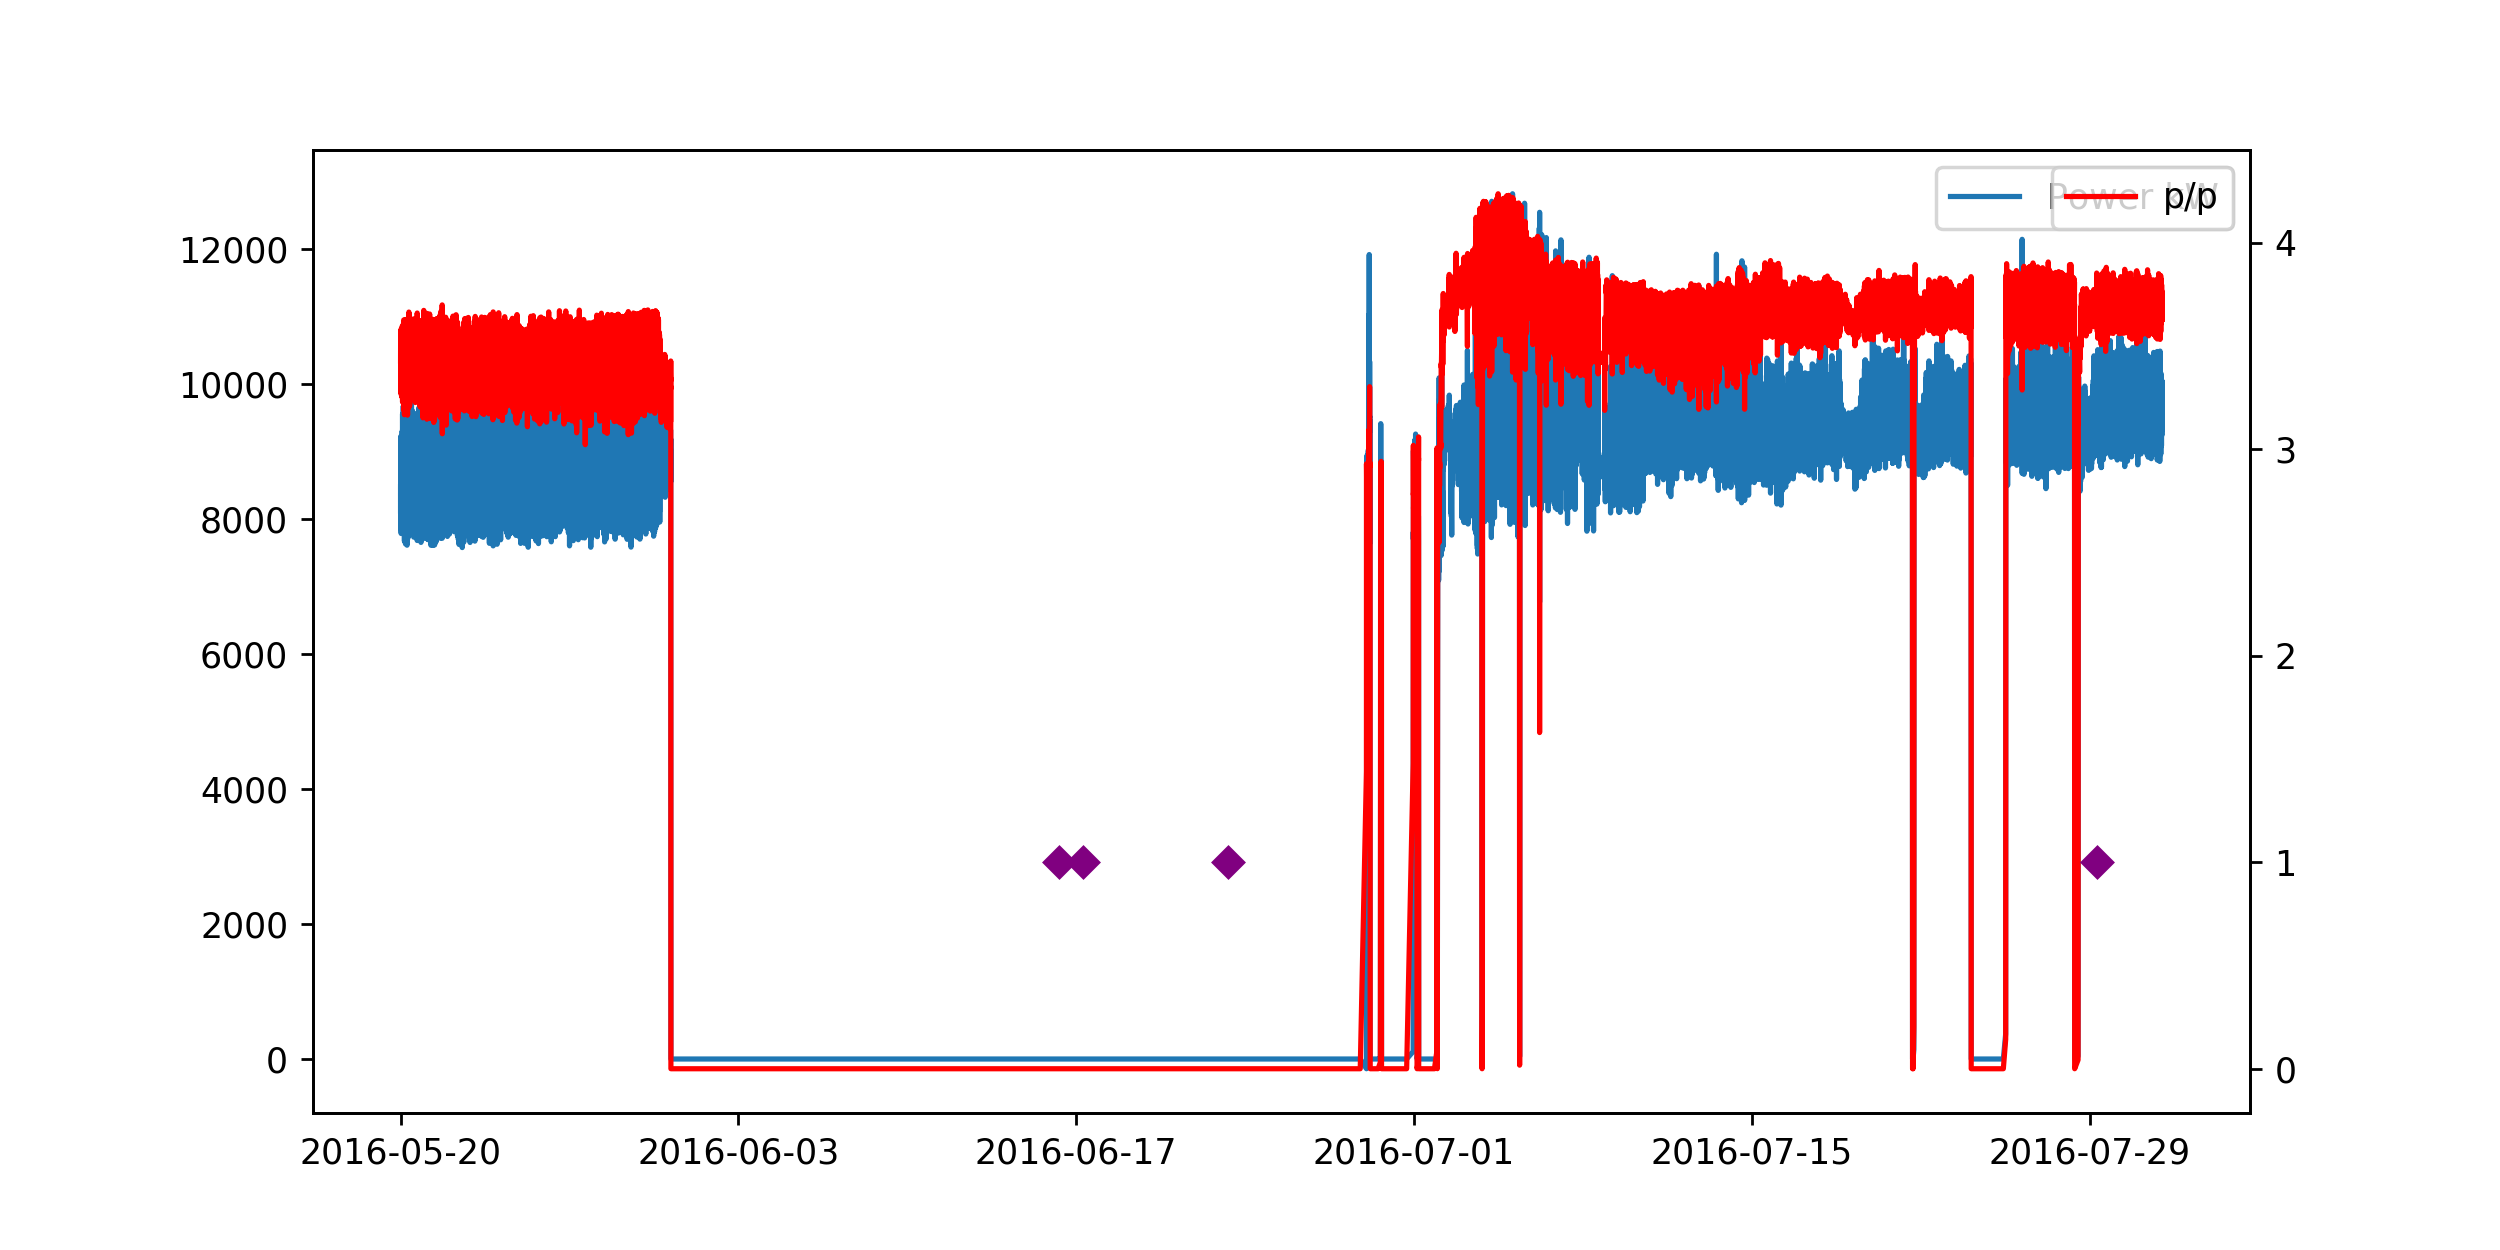

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
T = pd.to_datetime(data.timestamp, unit='ms')
ax.plot(T, data['VAL_23-KA-9101_ASP:VALUE|average'], label='Power kW')
ax2 = ax.twinx()
ax2.plot(T, data['VAL_23-KA-9101_APR:VALUE|average'], color='red', label='p/p')
ax.legend()
ax2.legend()

In [65]:
plt.plot(shutdown['startTime'], np.ones(len(shutdown)), 'D', color='purple')

In [66]:
# What is up with the oscilations
# Let us refine the search
start = datetime.datetime(2016, 5, 20)
end   = datetime.datetime(2016, 5, 21)
granularity = '1s'
aggregates = ['avg']
data = client.datapoints.get_datapoints_frame(time_series=['VAL_23-KA-9101_ASP:VALUE', 'VAL_23-KA-9101_APR:VALUE'], 
                            start = start, 
                            end = end, 
                            granularity = granularity, 
                            aggregates = aggregates)

In [67]:
data.head()

,timestamp,VAL_23-KA-9101_APR:VALUE|average,VAL_23-KA-9101_ASP:VALUE|average
0,1463702423000,3.427059,8486.843046
1,1463702453000,3.484703,8263.101459
2,1463702483000,3.664647,7270.082429
3,1463702513000,3.430669,9125.559491
4,1463702543000,3.366333,8827.223435


<IPython.core.display.Javascript object>


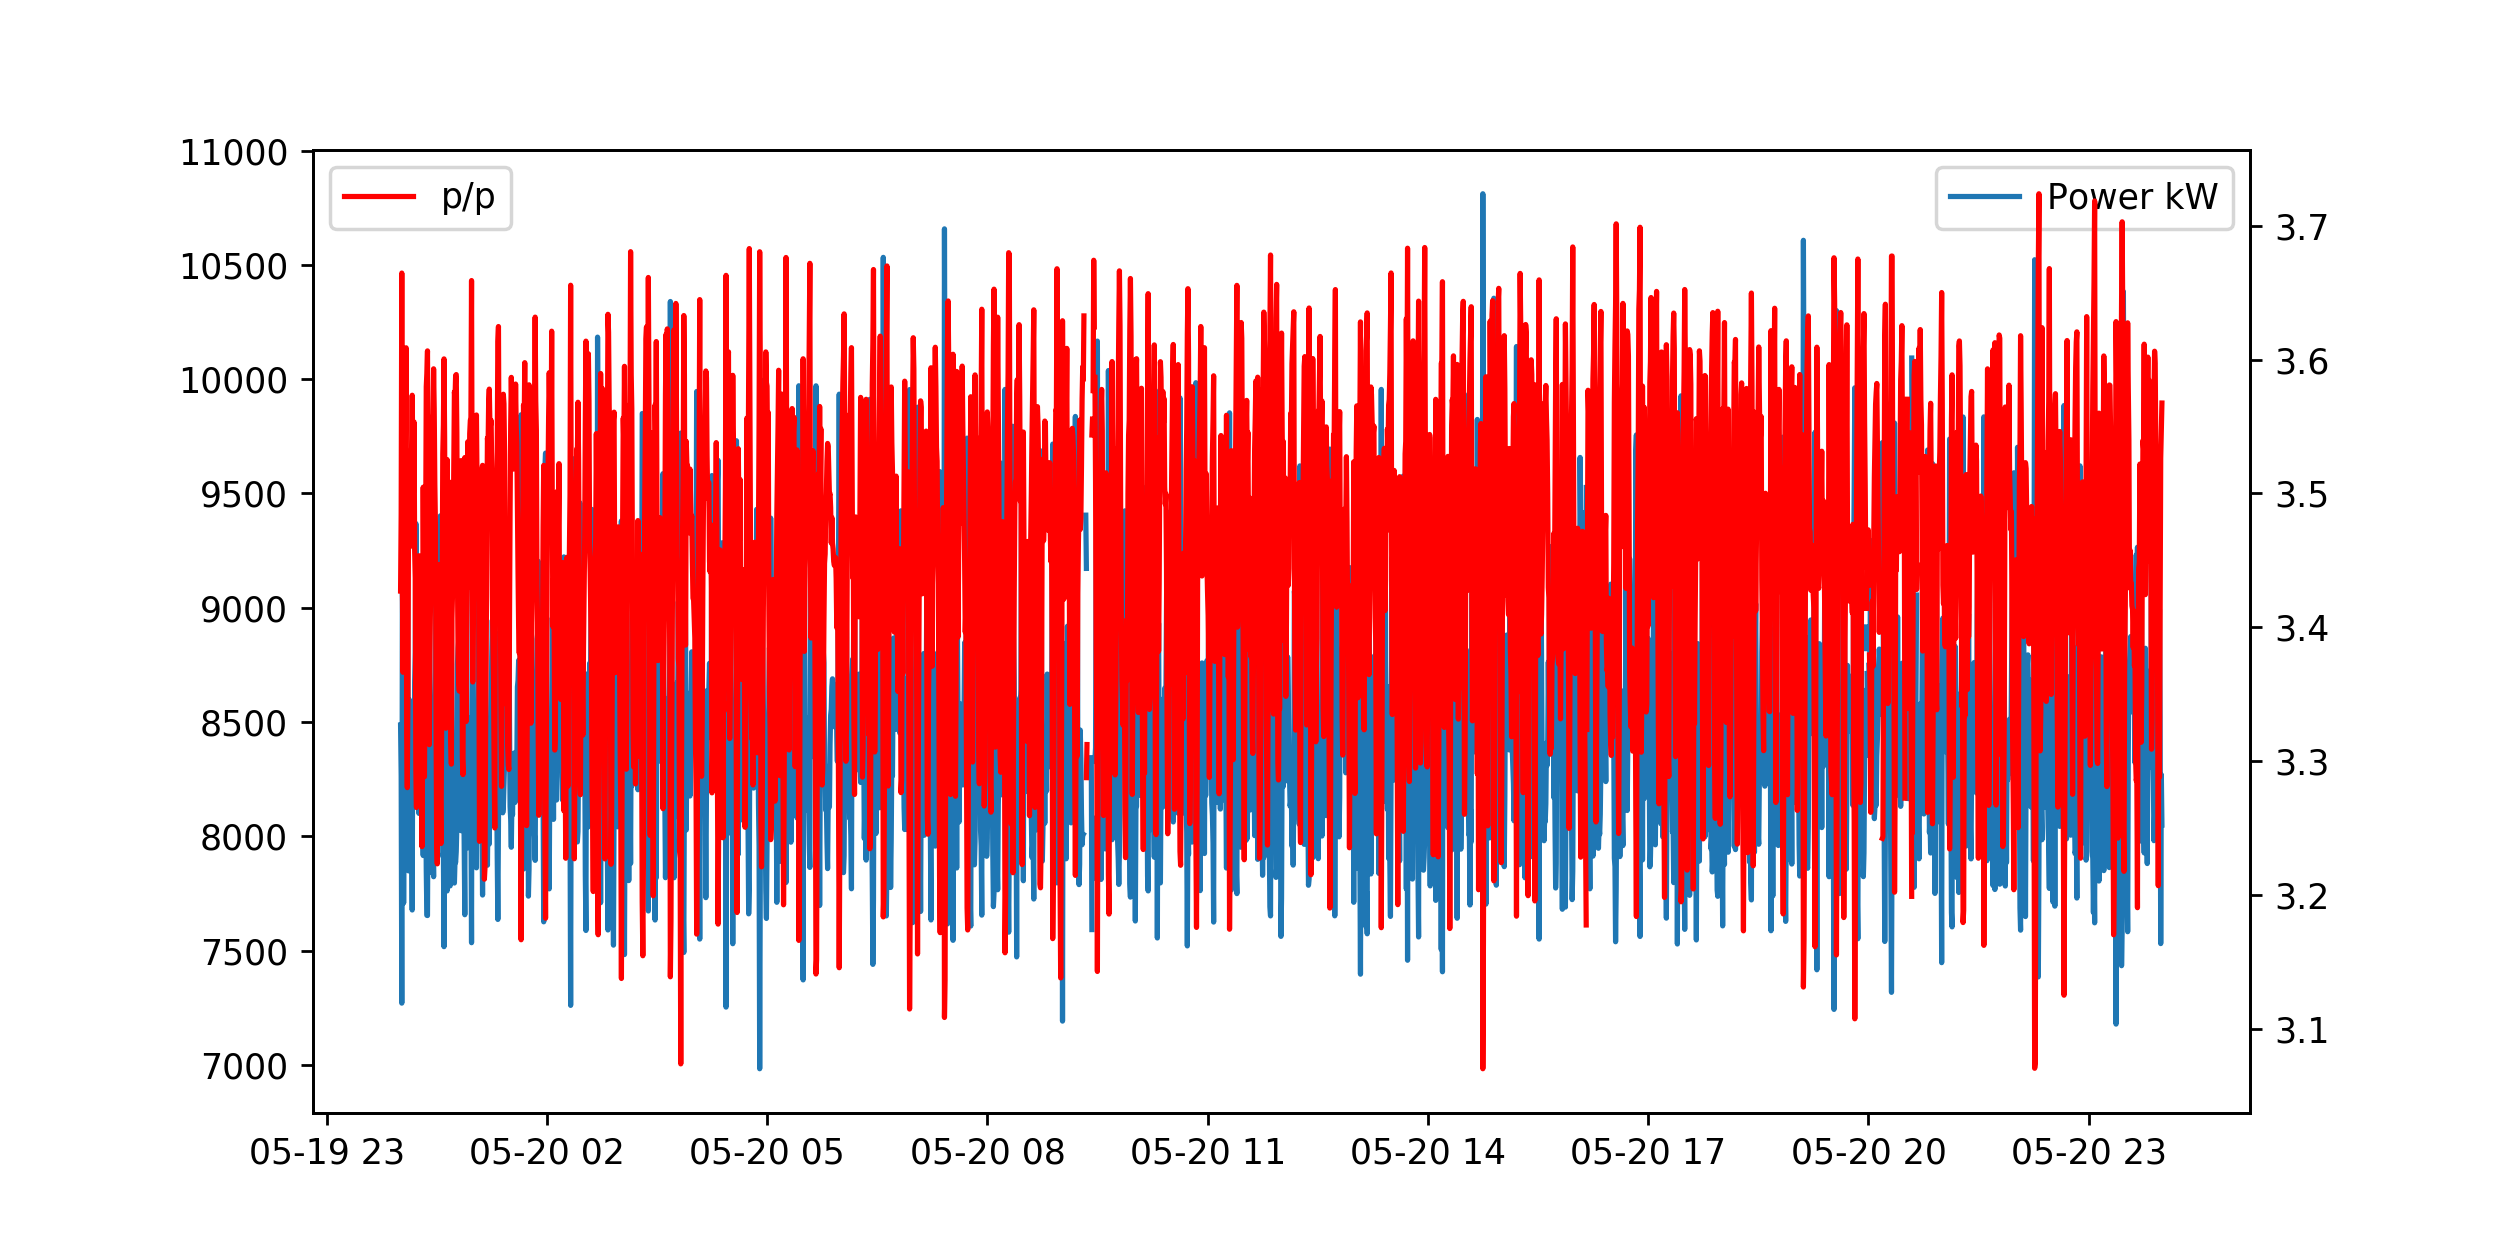

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
T = pd.to_datetime(data.timestamp, unit='ms')
ax.plot(T, data['VAL_23-KA-9101_ASP:VALUE|average'], label='Power kW')
ax2 = ax.twinx()
ax2.plot(T, data['VAL_23-KA-9101_APR:VALUE|average'], color='red', label='p/p')
ax.legend()
ax2.legend()

In [69]:
# What is up with the oscilations
# Let us refine the search
start = 0
end   = 'now'
granularity = '1d'
aggregates = ['avg','tv']
data = client.datapoints.get_datapoints_frame(time_series=['VAL_23-KA-9101_ASP:VALUE', 'VAL_23-KA-9101_APR:VALUE'], 
                            start = start, 
                            end = end, 
                            granularity = granularity, 
                            aggregates = aggregates)

<IPython.core.display.Javascript object>


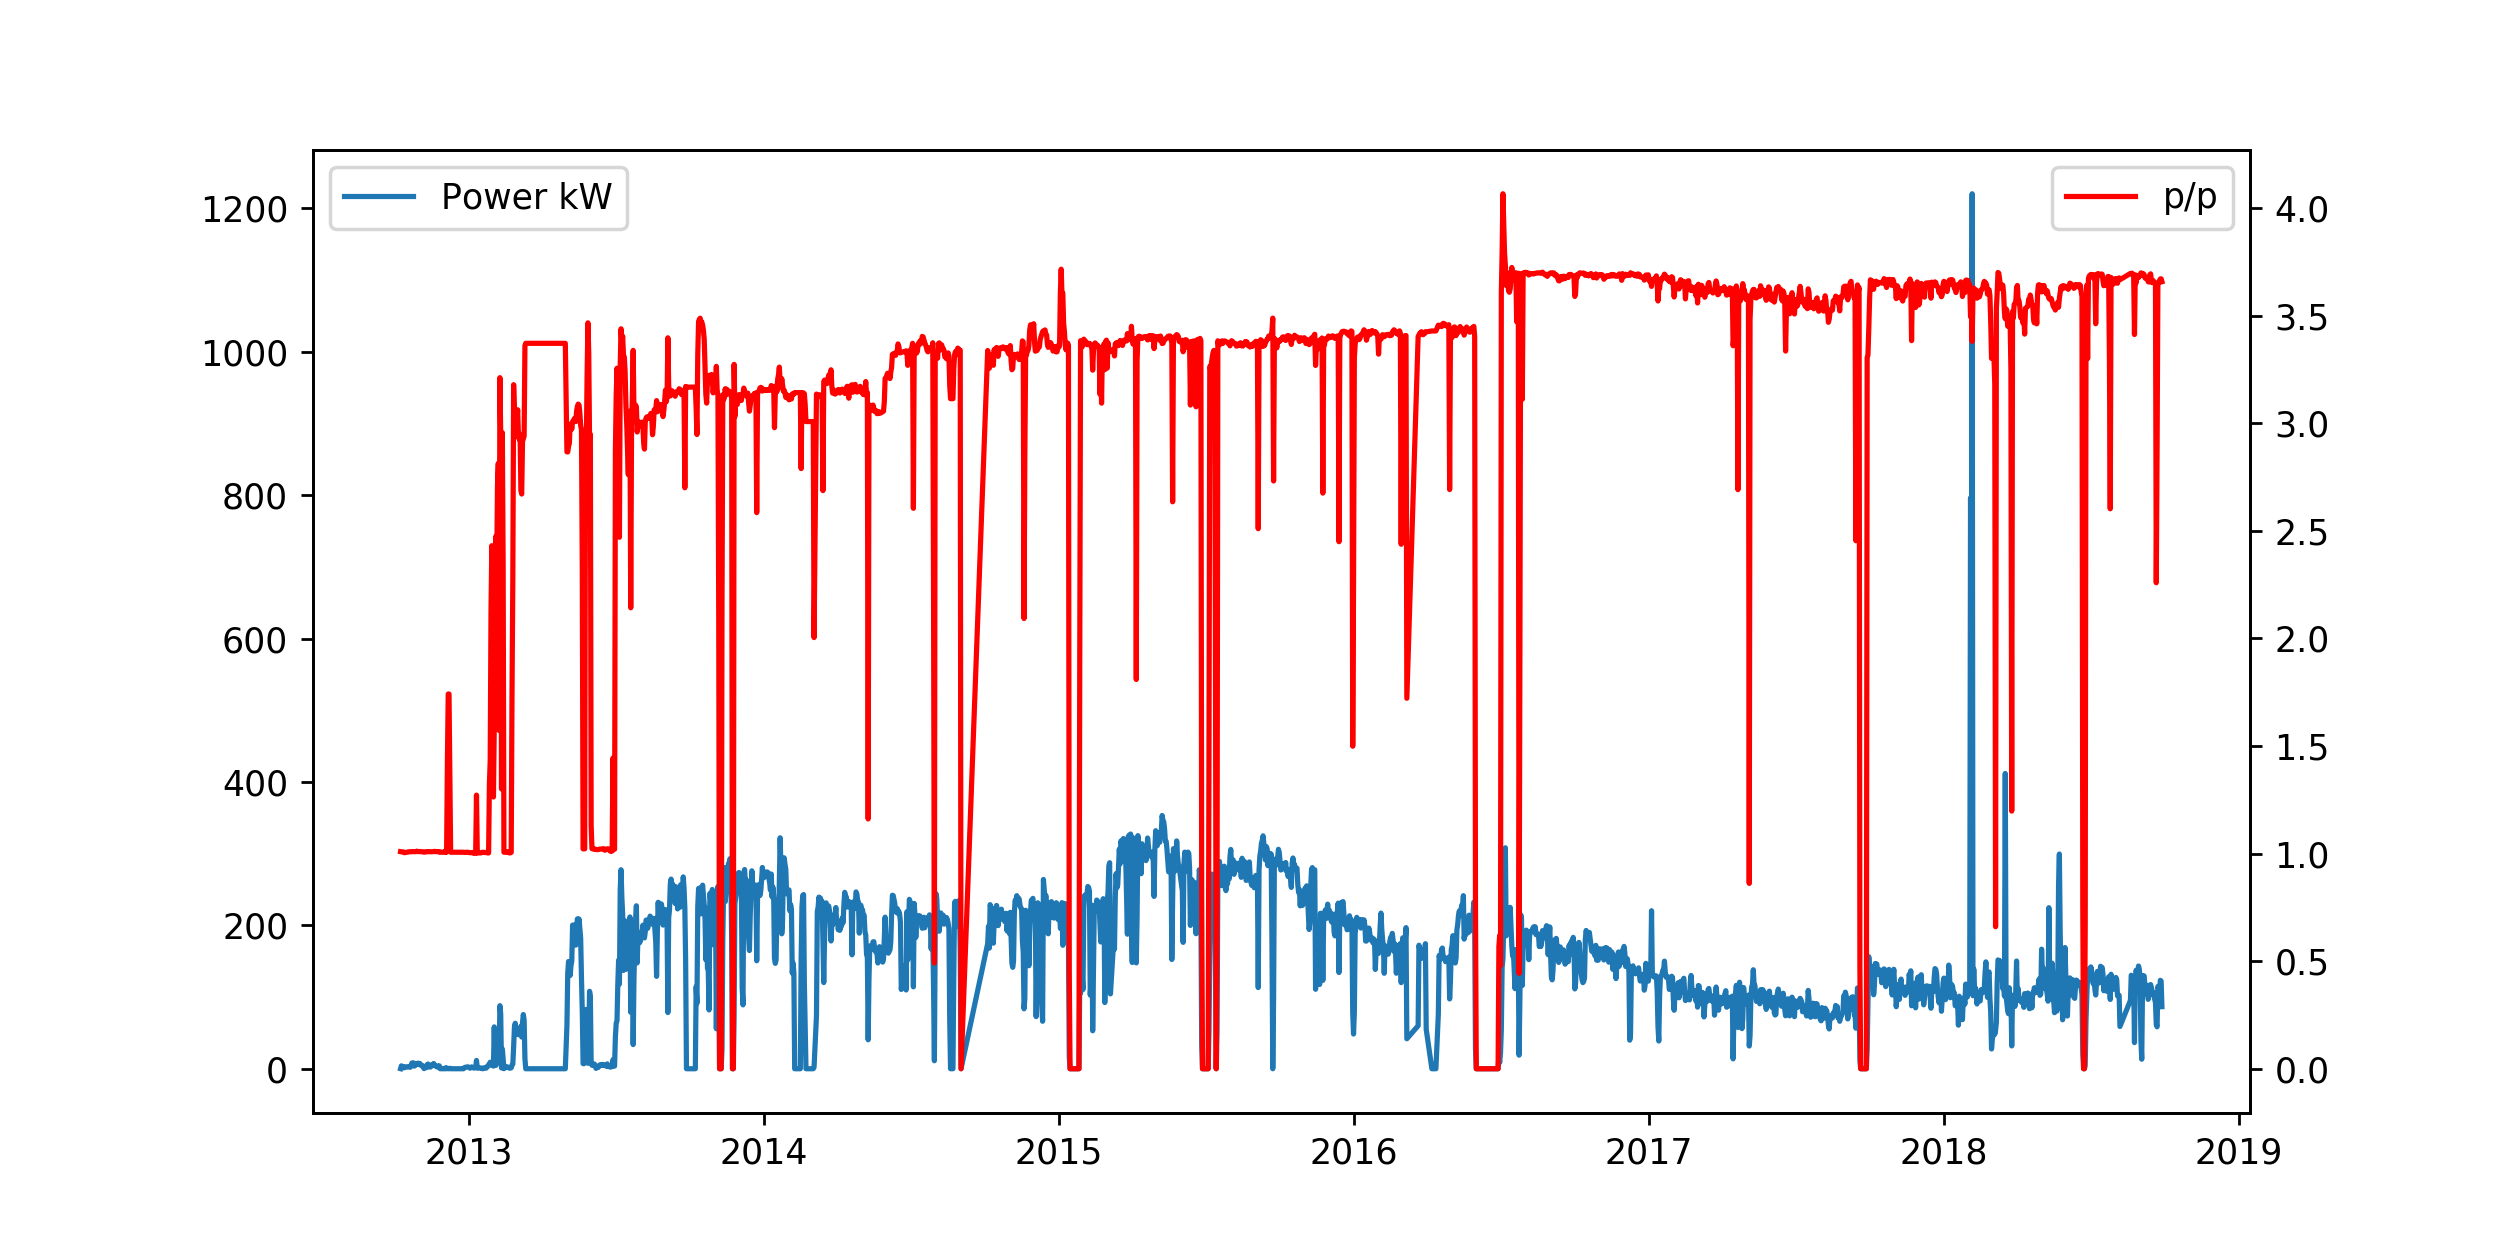

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
T = pd.to_datetime(data.timestamp, unit='ms')
ax.plot(T, data['VAL_23-KA-9101_APR:VALUE|totalvariation'], label='Power kW')
ax2 = ax.twinx()
ax2.plot(T, data['VAL_23-KA-9101_APR:VALUE|average'], color='red', label='p/p')
ax.legend()
ax2.legend()